## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
clinical_data = pd.merge(mouse_metadata,study_results, how = 'outer')
clinical_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_list = clinical_data["Mouse ID"].value_counts()
mice_number = len(mice_list)
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = clinical_data.loc[clinical_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_df = clinical_data[clinical_data['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_list = duplicate_df["Mouse ID"].value_counts()
clean_mice_number =len(clean_mice_list)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen_mean = duplicate_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_mean


drug_regimen_median = duplicate_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median


drug_regimen_variance = duplicate_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_variance


drug_regimen_std = duplicate_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_std

drug_regimen_sem = duplicate_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
single_groupby = duplicate_df.groupby('Drug Regimen')
results_table = single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
results_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

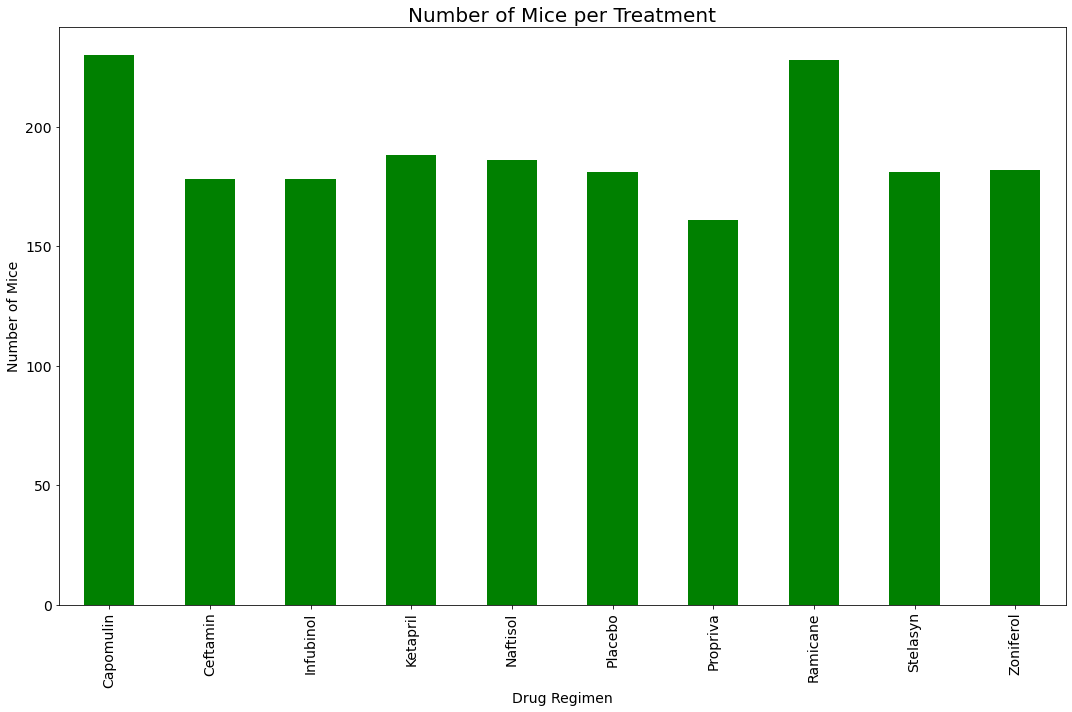

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_mice = clinical_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
#treatment_mice

plot_pandas = treatment_mice.plot.bar(figsize=(15,10), color='g',fontsize = 14)
#treatment_mice
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Number of Mice')

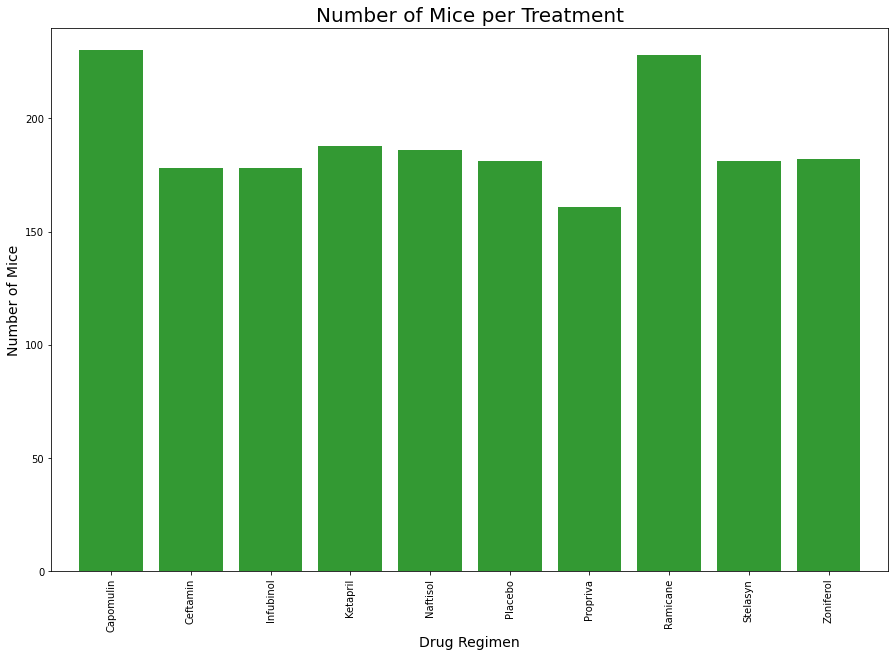

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_data =(clinical_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(treatment_mice))
fig1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_data, color='g', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_data)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Gender Demographics
# Group purchase data by gender to find count of Male and Female
gender_data_df = clinical_data.groupby("Sex")

# Find number of each unique gender
gender_count = gender_data_df["Mouse ID"].nunique()

# Find percentages of each gender
gender_percentage = gender_count / mice_number *100

# Create a data frame to display a table
gender_results = pd.DataFrame({"Total Count": gender_count,
                                    "Percentage of Sex": gender_percentage})
# Reset 
gender_summary = gender_results.rename_axis([""])

# Sort through all values 
gender_summary = gender_summary.sort_values("Total Count", ascending = False)

# Format the result to percentage values
gender_summary["Percentage of Sex"] = gender_summary["Percentage of Sex"].map("{:.2f}%".format)




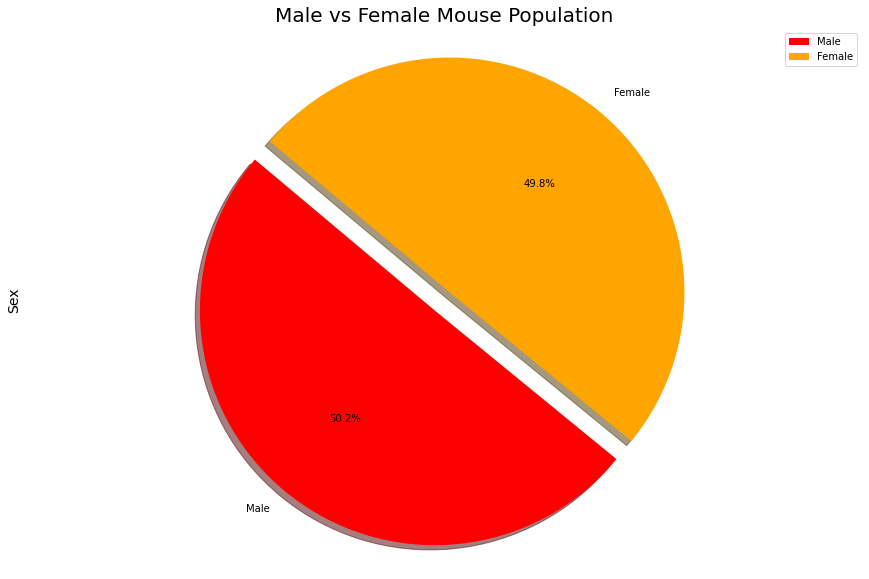

In [12]:
# Labels for the sections of our pie chart

colors = ["red", "orange"]

explode = (0.1, 0)

plot = gender_summary.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)

plt.ylabel('Sex',fontsize = 14)

plt.axis("equal")

plt.show()

(-1.1762377096492673,
 1.1254402725649653,
 -1.1903054119887595,
 1.124994709082835)

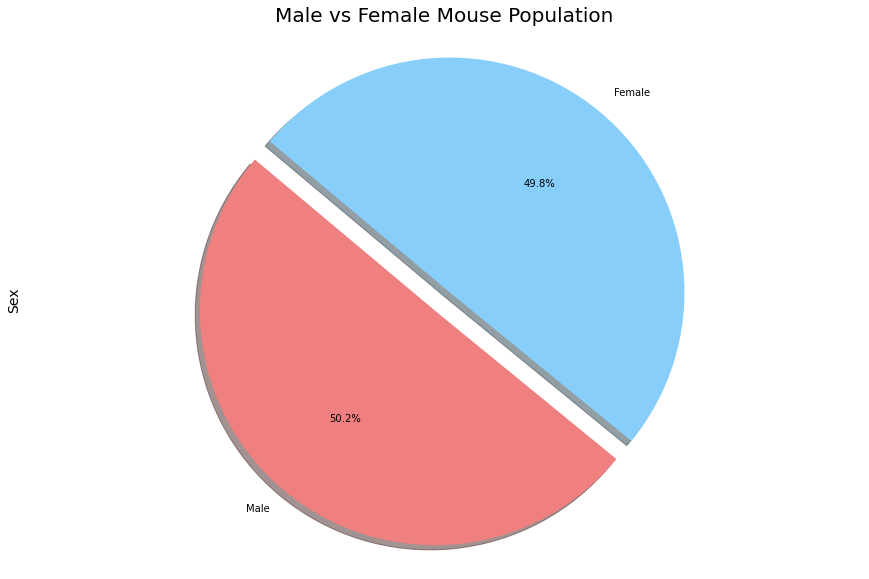

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [50.2,49.8]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
fig2 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#four_groupby = clinical_data.groupby(["Drug Regimen"])#.max['Timepoint']
#four_groupby.head()

capomulin_df = clinical_data.loc[clinical_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clinical_data.loc[clinical_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = clinical_data.loc[clinical_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clinical_data.loc[clinical_data["Drug Regimen"] == "Ceftamin", :]


In [15]:
# Capomulin
capomulin_tp = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_v = pd.DataFrame(capomulin_tp)
capomulin_merge = pd.merge(capomulin_v, clinical_data, on=("Mouse ID","Timepoint"),how="left")


tumors_C = capomulin_merge["Tumor Volume (mm3)"]
quartiles = tumors_C.quantile([.25,.5,.75])
quartiles_lower = quartiles[0.25]
quartiles_upper = quartiles[0.75]
iqr = quartiles_upper-quartiles_lower
lower_bound = quartiles_lower - (1.5*iqr)
upper_bound = quartiles_upper + (1.5*iqr)



In [16]:
# ramicane
ramicane_tp = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_v = pd.DataFrame(ramicane_tp)
ramicane_merge = pd.merge(ramicane_v, clinical_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

tumors_R = ramicane_merge["Tumor Volume (mm3)"]
quartiles = tumors_R.quantile([.25,.5,.75])
quartiles_lower = quartiles[0.25]
quartiles_upper = quartiles[0.75]
iqr = quartiles_upper-quartiles_lower
lower_bound = quartiles_lower - (1.5*iqr)
upper_bound = quartiles_upper + (1.5*iqr)

In [17]:
# infubinol
infubinol_tp = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_v = pd.DataFrame(infubinol_tp)
infubinol_merge = pd.merge(infubinol_v, clinical_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

tumors_I= infubinol_merge["Tumor Volume (mm3)"]
quartiles = tumors_I.quantile([.25,.5,.75])
quartiles_lower = quartiles[0.25]
quartiles_upper = quartiles[0.75]
iqr = quartiles_upper-quartiles_lower
lower_bound = quartiles_lower - (1.5*iqr)
upper_bound = quartiles_upper + (1.5*iqr)

In [18]:
# ceftamin
ceftamin_tp = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_v = pd.DataFrame(ceftamin_tp)
ceftamin_merge = pd.merge(ceftamin_v, clinical_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

tumors_CE= ceftamin_merge["Tumor Volume (mm3)"]
quartiles = tumors_CE.quantile([.25,.5,.75])
quartiles_lower = quartiles[0.25]
quartiles_upper = quartiles[0.75]
iqr = quartiles_upper-quartiles_lower
lower_bound = quartiles_lower - (1.5*iqr)
upper_bound = quartiles_upper + (1.5*iqr)

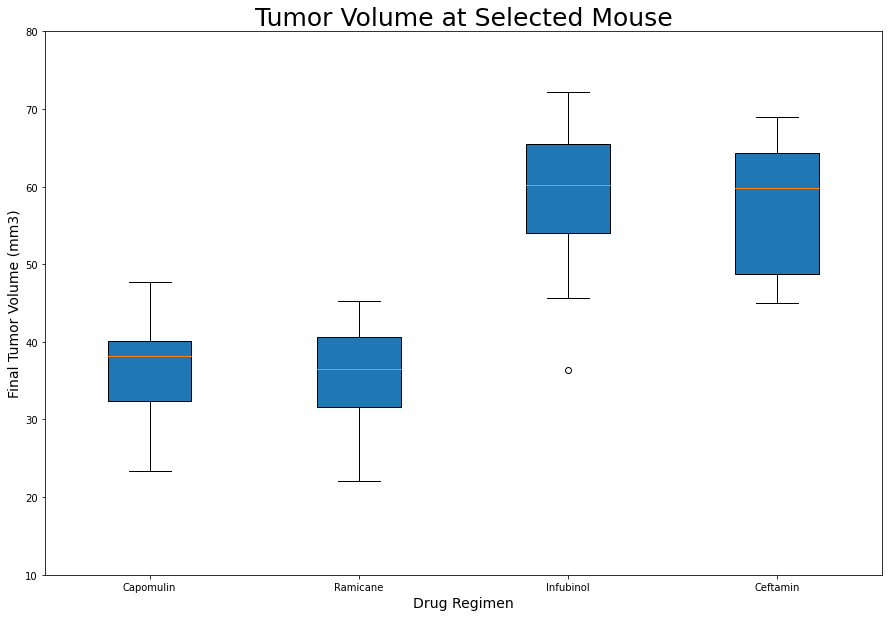

In [19]:
plot_data = [tumors_C,tumors_R,tumors_I,tumors_CE]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig3, ax1= plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(plot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 80)
plt.show()

In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

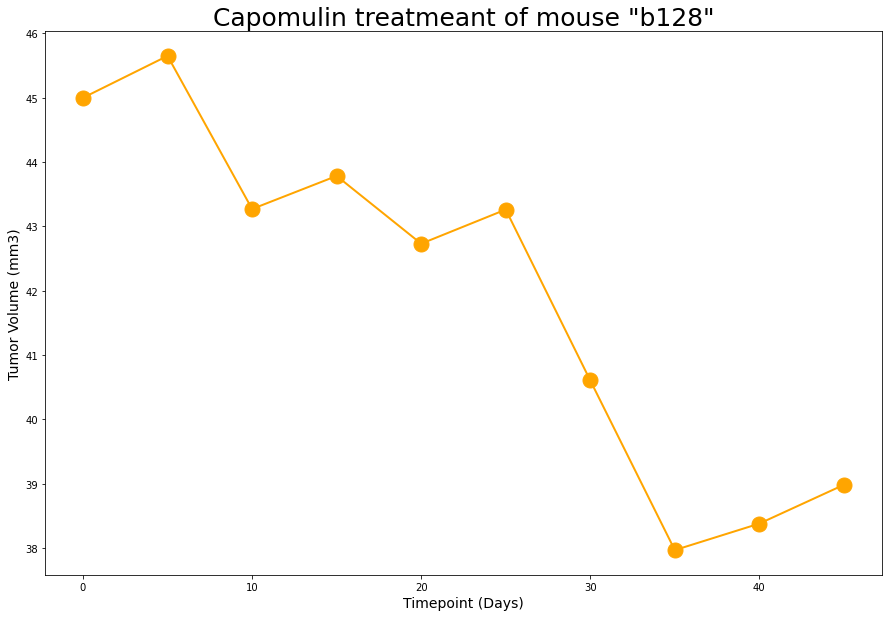

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
chosen_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]


x_axis = chosen_df["Timepoint"]
y_axis = chosen_df["Tumor Volume (mm3)"]

fig4 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse "b128"',fontsize =25)
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="orange", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)



plt.show()

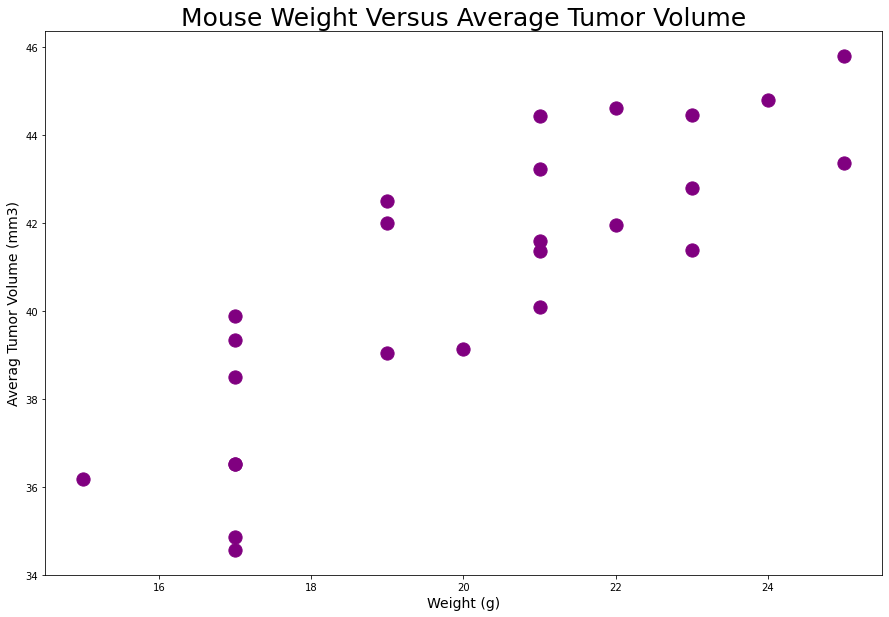

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig5= plt.subplots(figsize=(15, 10))
weight_volume =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(weight_volume['Weight (g)'],weight_volume['Tumor Volume (mm3)'],s=175, color="purple")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(weight_volume['Weight (g)'],weight_volume['Tumor Volume (mm3)'])[0],2)
x_values = weight_volume['Weight (g)']
y_values = weight_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


print(f"The correlation between mouse weight and average tumor volume is {corr}")
print("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
print(f"The r-squared is: {rvalue**2}")

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


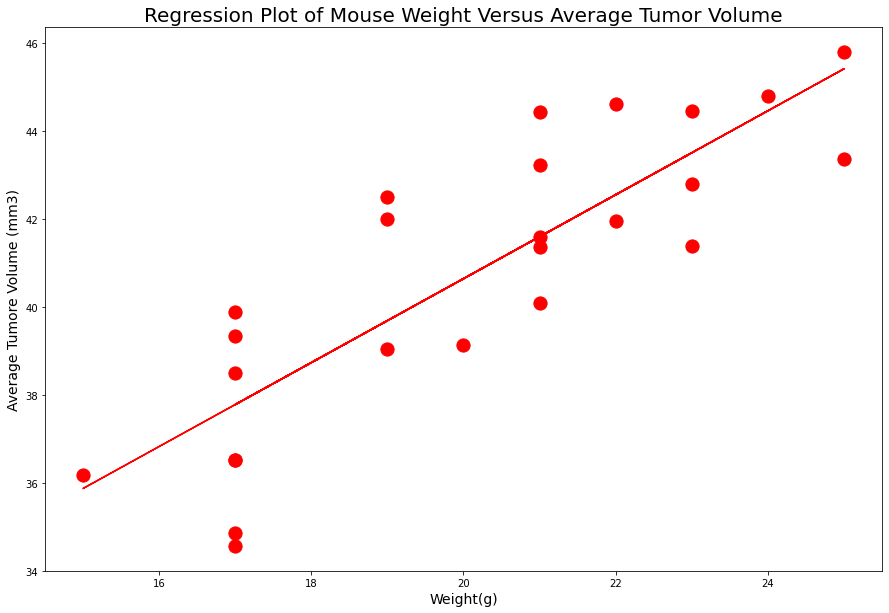

In [25]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)

plt.show()